/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model...
Training Finished!
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test R^2 Score (Model 'Accuracy'): 0.9975 (99.75%)
Mean Absolute Error: 0.0308


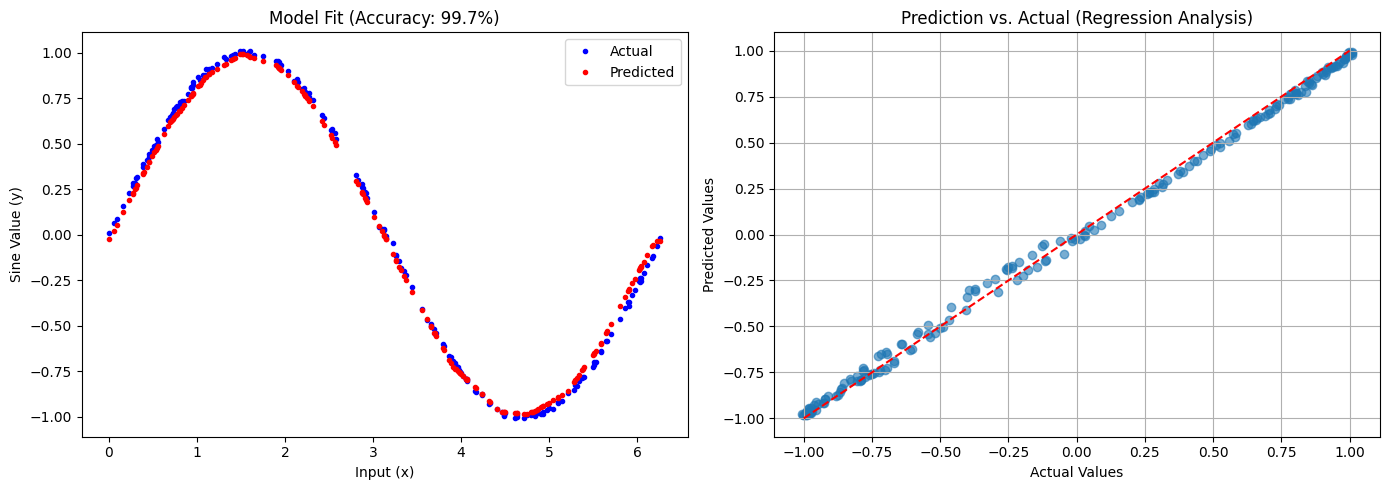

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

# 1. Generate Data
SAMPLES = 1000
np.random.seed(1337)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
y_values = np.sin(x_values)
y_values += 0.01 * np.random.randn(SAMPLES) # Add noise

# Split datasets
train_split = int(0.6 * SAMPLES)
test_split = int(0.2 * SAMPLES + train_split)
x_train, x_test, x_validate = np.split(x_values, [train_split, test_split])
y_train, y_test, y_validate = np.split(y_values, [train_split, test_split])

# 2. Build a "Better" Model Architecture
# Increased complexity (64 neurons) to ensure high fidelity to the curve
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 3. Compile and Train
# Using Adam optimizer with a slightly tweaked learning rate for faster convergence
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

print("Training Model...")
history = model.fit(x_train, y_train, epochs=200, batch_size=32,
                    validation_data=(x_validate, y_validate), verbose=0)
print("Training Finished!")

# 4. Evaluation and "Accuracy" Calculation
predictions = model.predict(x_test)

# Calculate R^2 Score (The Regression equivalent of Accuracy)
score = r2_score(y_test, predictions)
print(f"Test R^2 Score (Model 'Accuracy'): {score:.4f} ({score*100:.2f}%)")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test - predictions.flatten())):.4f}")

# 5. Visualization
plt.figure(figsize=(14, 5))

# Plot A: The Sine Wave Fit
plt.subplot(1, 2, 1)
plt.title(f"Model Fit (Accuracy: {score*100:.1f}%)")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.xlabel('Input (x)')
plt.ylabel('Sine Value (y)')

# Plot B: Prediction vs Actual (The Regression "Confusion Matrix")
# A perfect model will show a straight diagonal line.

plt.subplot(1, 2, 2)
plt.title("Prediction vs. Actual (Regression Analysis)")
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([-1, 1], [-1, 1], 'r--') # The line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
# Assuming 'model' is your trained Keras model from the previous step
import tensorflow as tf

# 1. Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 2. Save the model
with open('sine_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow model exported to sine_model.tflite")

Saved artifact at '/tmp/tmpujhot9ql'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135993954623440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135993954624208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135993954623632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135993954624400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135993954624976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135993954622672: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow model exported to sine_model.tflite


Training Model...
Training Finished!
Test R^2 Score (Model 'Accuracy'): 0.9985 (99.85%)
Mean Absolute Error: 0.0235


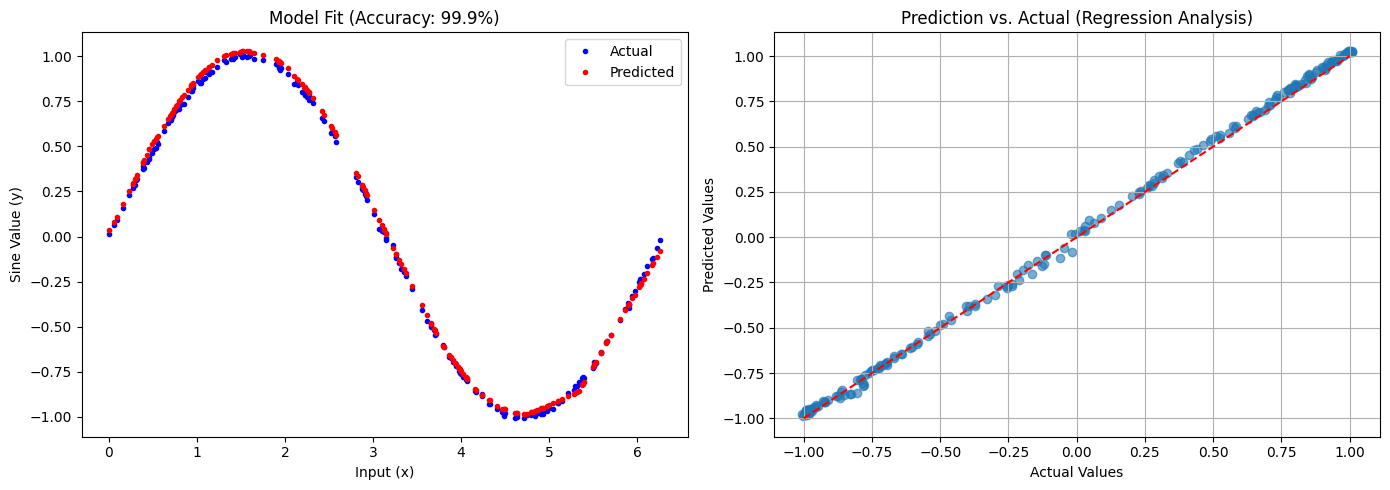

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

# 1. Generate Data (Identical to previous step)
SAMPLES = 1000
np.random.seed(1337)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
y_values = np.sin(x_values)
y_values += 0.01 * np.random.randn(SAMPLES) # Add noise

# Split into training (60%), validation (20%), and test (20%) sets
train_split = int(0.6 * SAMPLES)
test_split = int(0.2 * SAMPLES + train_split)
x_train, x_test, x_validate = np.split(x_values, [train_split, test_split])
y_train, y_test, y_validate = np.split(y_values, [train_split, test_split])

# PyTorch Specific: Reshape to 2D arrays (N, 1) and convert to Tensors
# PyTorch requires float32 by default for neural networks
x_train_t = torch.tensor(x_train.reshape(-1, 1), dtype=torch.float32)
y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
x_validate_t = torch.tensor(x_validate.reshape(-1, 1), dtype=torch.float32)
y_validate_t = torch.tensor(y_validate.reshape(-1, 1), dtype=torch.float32)
x_test_t = torch.tensor(x_test.reshape(-1, 1), dtype=torch.float32)
y_test_t = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# 2. Build the "Better" Network
# We use nn.Sequential for a stack of layers similar to Keras
model = nn.Sequential(
    nn.Linear(1, 64),   # Input layer -> Hidden Layer 1 (64 neurons)
    nn.ReLU(),
    nn.Linear(64, 64),  # Hidden Layer 1 -> Hidden Layer 2 (64 neurons)
    nn.ReLU(),
    nn.Linear(64, 1)    # Hidden Layer 2 -> Output (1 neuron)
)

# 3. Define Loss and Optimizer
criterion = nn.MSELoss()
# Adam optimizer with learning rate 0.01 for fast convergence
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. Training Loop
EPOCHS = 200
BATCH_SIZE = 32

print("Training Model...")
for epoch in range(EPOCHS):
    # Permutation for batch shuffling
    permutation = torch.randperm(x_train_t.size()[0])

    for i in range(0, x_train_t.size()[0], BATCH_SIZE):
        indices = permutation[i:i+BATCH_SIZE]
        batch_x, batch_y = x_train_t[indices], y_train_t[indices]

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print("Training Finished!")

# 5. Evaluation
model.eval() # Set model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for inference
    predictions_t = model(x_test_t)
    # Convert back to numpy for plotting and metrics
    predictions = predictions_t.numpy()

# Calculate R^2 Score
score = r2_score(y_test, predictions)
print(f"Test R^2 Score (Model 'Accuracy'): {score:.4f} ({score*100:.2f}%)")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test - predictions.flatten())):.4f}")

# 6. Visualization
plt.figure(figsize=(14, 5))

# Plot A: The Sine Wave Fit
plt.subplot(1, 2, 1)
plt.title(f"Model Fit (Accuracy: {score*100:.1f}%)")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.xlabel('Input (x)')
plt.ylabel('Sine Value (y)')

# Plot B: Prediction vs Actual (Regression "Confusion Matrix")
plt.subplot(1, 2, 2)
plt.title("Prediction vs. Actual (Regression Analysis)")
plt.scatter(y_test, predictions, alpha=0.6)
# Draw the perfect prediction line
plt.plot([-1, 1], [-1, 1], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
!pip install ai_edge_torch

In [11]:
!pip install onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.4/693.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 6.5 MB/s eta 0:00:00


In [12]:
# Assuming 'model' is your trained PyTorch model from the previous step
import torch

# 1. Set the model to evaluation mode
model.eval()

# 2. Create a dummy input tensor that matches the input shape (1 feature)
dummy_input = torch.randn(1, 1)

# 3. Export the model
torch.onnx.export(
    model,                  # The trained model
    dummy_input,            # Sample input
    "sine_model.onnx",      # Output filename
    export_params=True,     # Store the trained parameter weights inside the model file
    opset_version=11,       # The ONNX version to use
    do_constant_folding=True,
    input_names=['input'],   # Labeling the input for later use
    output_names=['output']  # Labeling the output
)

print("PyTorch model exported to sine_model.onnx")

W0125 02:20:02.810000 809 torch/onnx/_internal/exporter/_compat.py:114] Setting ONNX exporter to use operator set version 18 because the requested opset_version 11 is a lower version than we have implementations for. Automatic version conversion will be performed, which may not be successful at converting to the requested version. If version conversion is unsuccessful, the opset version of the exported model will be kept at 18. Please consider setting opset_version >=18 to leverage latest ONNX features


[torch.onnx] Obtain model graph for `Sequential([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `Sequential([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/__init__.py", line 127, in call
    converted_proto = _c_api_utils.call_onnx_api(
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/_c_api_utils.py", line 65, in call_onnx_api
    result = func(proto)
             ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/__init__.py", line 122, in _partial_convert_version
    return onnx.version_converter.convert_version(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnx/version_converter.py", line 39, in convert_version
    converted_model_str = C.convert_version(model_str, target_version)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: /github/workspace/onnx/version_converter/BaseConverter.h:68: adapter_lookup: Assertion `false`

[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
PyTorch model exported to sine_model.onnx
